In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
glove_path ='/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt'

In [3]:
import sys, os, re, csv, codecs
import numpy as np
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
!pip install --upgrade tensorflow
from textblob import TextBlob
from google.colab import files
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, f1_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import BatchNormalization, Reshape, concatenate
from tensorflow.keras.layers import Dense, Input, LSTM, Bidirectional,GRU, Embedding, Dropout, Activation, GlobalAveragePooling1D, GlobalMaxPooling1D, MaxPooling1D, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
np.random.seed(0)
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')
import plotly
from plotly import graph_objs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')


In [5]:
df = df.drop(columns=['id'])

In [6]:
df.shape

(17197, 1)

In [7]:
df = df.dropna()

In [8]:
#preprocessing
def CleanTxt(text):
    text = text.lower() #lowercase
    text = re.sub(r'https\S+|www\S+https\S+','',text,flags=re.MULTILINE) #remove URL
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove letters and numbers
    text=re.sub(r'#', ' ', text) # hashtag
    text=re.sub(r'&[\S]+?;', '', text) #remove character references
    text=re.sub(r'(\bRT\b|\bQT\b)', '', text) #remove rt and QT
    text=re.sub(r'https?:\/\/\S+', '', text)  #web
    text=re.sub(r'[^\w\s]', r'', text)  #remove punctuation
    text=re.sub(r"\b[a-zA-Z]\b", "", text)
    text=re.sub(r'\[.*?\]', '', text)
    text=re.sub(r'\s\s+', ' ', text) #remove whitespaces
    text=re.sub(r'(\A\s+|\s+\Z)', '', text) #remove leading and trailing whitespaces
    text=re.sub(r'\w*\d\w*', r'', text) #remove words with digits
    text=re.sub("\d","", text)  #delete  numbers
    text=re.sub("[^A-Za-z]"," ", text)
    text=re.sub(r'([a-zA-Z])\0+', r'\0', text) #remove repeating characters
    text=re.sub(r'\b\w{1,2}\b', '', text)
    return text

df["tweet"]=df["tweet"].apply(CleanTxt)


In [9]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["tweet"]=df["tweet"].apply(remove_emoji)

In [10]:
def lower_case(df):
    df["tweet"] = df["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['tweet'].head())

In [11]:
lower_case(df)

0    studiolife aislife requires passion dedication...
1    white supremacists want everyone see the new b...
2    safe ways heal your acne altwaystoheal healthy...
3    the and the cursed child book for reservations...
4    bihday amazing hilarious nephew eli ahmir uncl...
Name: tweet, dtype: object


In [12]:
def short_words(data, min_word_length):
    df["tweet"] = df["tweet"].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 2]))
    return data

In [13]:
def expand(data):
    df["tweet"] = df["tweet"].str.replace("won't", "will not")
    df["tweet"] = df["tweet"].str.replace("can't", "cannot")
    df["tweet"] = df["tweet"].str.replace("don't", "do not")
    df["tweet"] = df["tweet"].str.replace("wil", "will")
    df["tweet"] = df["tweet"].str.replace("fuck", "bitch")
    df["tweet"] = df["tweet"].str.replace("asshole", "bastard")
    df["tweet"] = df["tweet"].str.replace("fuckin", "shit")
    df["tweet"] = df["tweet"].str.replace("hoe", "stop")
    return data

In [14]:
df = df[df["tweet"].notna() & (df["tweet"] != '')]
df["tweet"] = df.tweet.str.replace('@user', '')

In [15]:
f = pd.Series(' '.join(df["tweet"]).split()).value_counts()[:10]
f

the     5503
you     2883
and     2693
for     2497
love    1536
this    1436
with    1350
day     1179
all     1066
that    1007
dtype: int64

In [16]:
def fremoval(df):
    df["tweet"] = df["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in f))
    print(df["tweet"].head())

fremoval(df)


0    studiolife aislife requires passion dedication...
1    white supremacists want everyone see new birds...
2    safe ways heal your acne altwaystoheal healthy...
3    cursed child book reservations already yes whe...
4    bihday amazing hilarious nephew eli ahmir uncl...
Name: tweet, dtype: object


In [17]:
#rare word removal
r = pd.Series(' '.join(df["tweet"]).split()).value_counts()[-10:]
r

kingdomcome         1
modes               1
rolfs               1
sweatshi            1
homeowners          1
homeowner           1
signyourlifeaway    1
nsu                 1
wastes              1
shoegaze            1
dtype: int64

In [18]:
def rremoval(df):
    df["tweet"] = df["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in r))
    print(df["tweet"].head())

rremoval(df)

0    studiolife aislife requires passion dedication...
1    white supremacists want everyone see new birds...
2    safe ways heal your acne altwaystoheal healthy...
3    cursed child book reservations already yes whe...
4    bihday amazing hilarious nephew eli ahmir uncl...
Name: tweet, dtype: object


In [19]:
def remove_repeating_words(text):
    words = text.split()
    unique_words = list(set(words))
    return ' '.join(unique_words)

# Apply the function to the 'Text' column
df['tweet'] = df['tweet'].apply(remove_repeating_words)


In [20]:
def spell(df):
    return df["tweet"][:50].apply(lambda x: str(TextBlob(x).correct()))


In [21]:
df.head(15)

,tweet
0,requires aislife studiolife dedication willpow...
1,here why see want new supremacists everyone bi...
2,altwaystoheal healthy heal acne healing ways y...
3,child when already reservations cursed harrypo...
4,uncle hilarious bihday nephew loves dave ahmir...
5,choose momtips
6,ness tired dies something inside grunge sof lo...
7,ink tattoo thanks aleeee inked loveit finished
8,when why inthefeels never left was deep young ...
9,delicious mannaepicure lovelife capetown food ...


In [22]:
def num_of_words(df, col):
    df['word_ct'] = df[col].apply(lambda x: len(str(x).split(" ")))
    print(df[[col, 'word_ct']].head())

num_of_words(df, 'tweet')

                                               tweet  word_ct
0  requires aislife studiolife dedication willpow...        8
1  here why see want new supremacists everyone bi...       10
2  altwaystoheal healthy heal acne healing ways y...        8
3  child when already reservations cursed harrypo...       11
4  uncle hilarious bihday nephew loves dave ahmir...       10


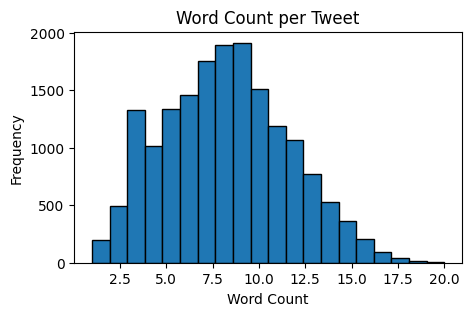

In [23]:
plt.figure(figsize=(5, 3))
plt.hist(df['word_ct'], bins=20, edgecolor='black')
plt.title('Word Count per Tweet')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [24]:
def num_of_chars(df, col):
    df['char_ct'] = df[col].str.len()
    print(df[[col, 'char_ct']].head())

num_of_chars(df, 'tweet')

                                               tweet  char_ct
0  requires aislife studiolife dedication willpow...       74
1  here why see want new supremacists everyone bi...       61
2  altwaystoheal healthy heal acne healing ways y...       54
3  child when already reservations cursed harrypo...       85
4  uncle hilarious bihday nephew loves dave ahmir...       65


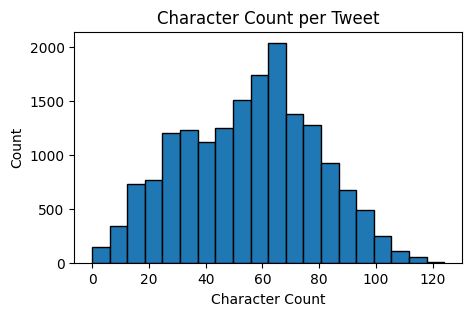

In [25]:
plt.figure(figsize=(5, 3))
plt.hist(df['char_ct'], bins=20, edgecolor='black')
plt.title('Character Count per Tweet')
plt.xlabel('Character Count')
plt.ylabel('Count')
plt.show()

In [26]:
def hash_ct(df, col):
    df['hash_ct'] = df[col].apply(lambda x: len(re.split(r'#', str(x)))-1)
    #print(df[[col, 'hash_ct']].head())

hash_ct(df, 'tweet')

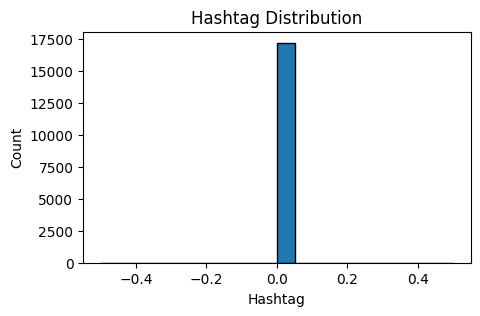

In [27]:
plt.figure(figsize=(5, 3))
plt.hist(df['hash_ct'], bins=20, edgecolor='black')
plt.title('Hashtag Distribution')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.show()

In [28]:
def calculate_sentiment(text):
    blob = TextBlob(text)
    subjectivity = blob.sentiment.subjectivity
    polarity = blob.sentiment.polarity
    # Calculate sentiment score by combining subjectivity and polarity
    return subjectivity, polarity

# Calculate subjectivity, polarity, and sentiment scores, and add them as new columns in the dataset
df['Subjectivity'], df['Polarity'] = zip(*df['tweet'].apply(calculate_sentiment))


In [29]:
def getAnalysis(score):
    if score < 0:
        return 0
    else:
        return 1

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

In [33]:
df.head(30)

,tweet,word_ct,char_ct,hash_ct,Subjectivity,Polarity,Sentiment
0,requires aislife studiolife dedication willpow...,8,74,0,0.000000,0.000000,1
1,here why see want new supremacists everyone bi...,10,61,0,0.227273,0.068182,1
2,altwaystoheal healthy heal acne healing ways y...,8,54,0,0.500000,0.500000,1
3,child when already reservations cursed harrypo...,11,85,0,1.000000,0.500000,1
4,uncle hilarious bihday nephew loves dave ahmir...,10,65,0,0.950000,0.550000,1
5,choose momtips,2,14,0,0.000000,0.000000,1
6,ness tired dies something inside grunge sof lo...,10,66,0,0.700000,-0.250000,0
7,ink tattoo thanks aleeee inked loveit finished,7,46,0,0.200000,0.200000,1
8,when why inthefeels never left was deep young ...,11,65,0,0.266667,0.033333,1
9,delicious mannaepicure lovelife capetown food ...,6,55,0,1.000000,1.000000,1


In [ ]:
df['Sentiment'].value_counts()

0    9112
1    8083
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

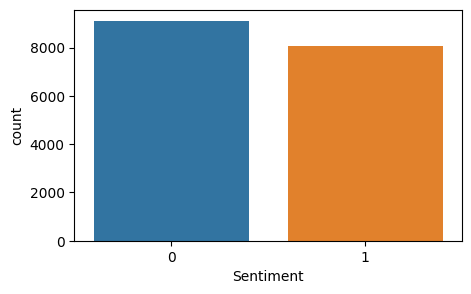

In [ ]:
fig = plt.figure(figsize=(5,3))
sns.countplot(x="Sentiment",data=df)

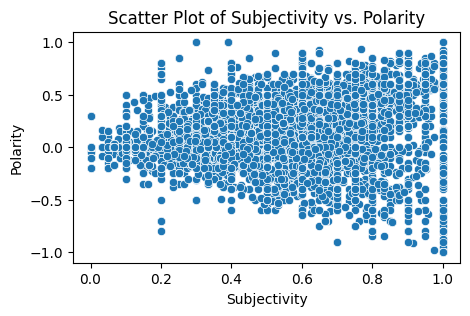

In [ ]:
plt.figure(figsize=(5, 3))

# Plot subjectivity on the x-axis and polarity on the y-axis
sns.scatterplot(data=df, x='Subjectivity', y='Polarity')

# Add labels and a title
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Scatter Plot of Subjectivity vs. Polarity')

# Display the plot
plt.show()


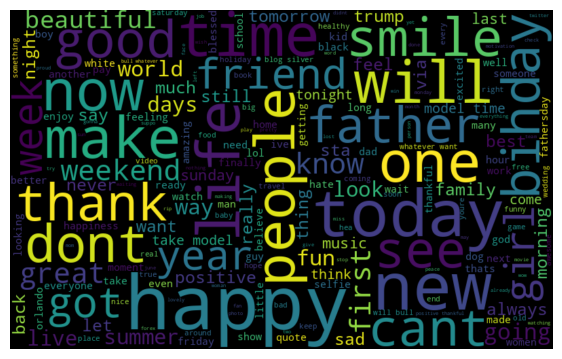

In [ ]:
all_words = ' '.join([text for text in df["tweet"]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


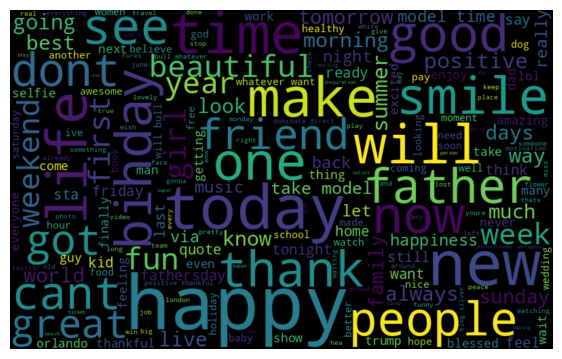

In [ ]:
h = ' '.join([text for text in df["tweet"][df["Sentiment"] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(h)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

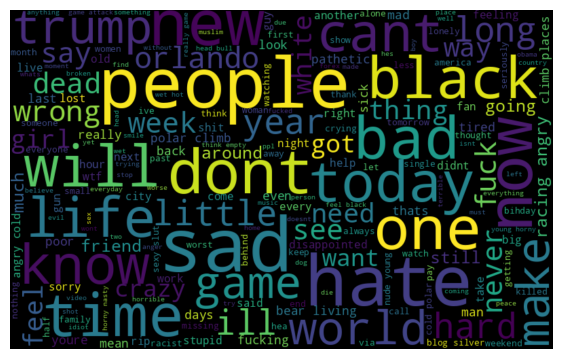

In [ ]:
nh = ' '.join([text for text in df["tweet"][df["Sentiment"] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(nh)
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
max_length = df.tweet.apply(lambda x: len(x.split())).max()

t = Tokenizer()
t.fit_on_texts(df.tweet)
vocab_size = len(t.word_index) + 1
encoded_tweets = t.texts_to_sequences(df.tweet)
print(encoded_tweets[100])
padded_tweets = sequence.pad_sequences(encoded_tweets, maxlen=max_length, padding='post')
print(padded_tweets)

vocab_size = len(t.word_index) + 1

[7, 965, 454, 285, 3130, 727, 3696, 6000, 653, 4562, 9232]
[[ 5971  9120  3121 ...     0     0     0]
 [  131    33    16 ...     0     0     0]
 [   36  2415   749 ...     0     0     0]
 ...
 [   92   410 25617 ...     0     0     0]
 [  468   392   615 ...     0     0     0]
 [ 4204   124  1308 ...     0     0     0]]


In [ ]:
embeddings_index = dict()
f = open('/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector= embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        print(embedding_matrix)

Streaming output truncated to the last 5000 lines.
   0.87286001]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.96192998  0.012516    0.21732999 ...  0.14032    -0.38468
  -0.38712001]
 [ 0.092086    0.25709999 -0.58692998 ... -0.39442     0.10511
   0.87286001]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.96192998  0.012516    0.21732999 ...  0.14032    -0.38468
  -0.38712001]
 [ 0.092086    0.25709999 -0.58692998 ... -0.39442     0.10511
   0.87286001]
 ...
 [ 0.          0.    

[1 1 0 ... 1 1 1]
[1 0 1 ... 1 0 1]

After SMOTE:
Resampled Train Set: Counter({1: 11676, 0: 11676})


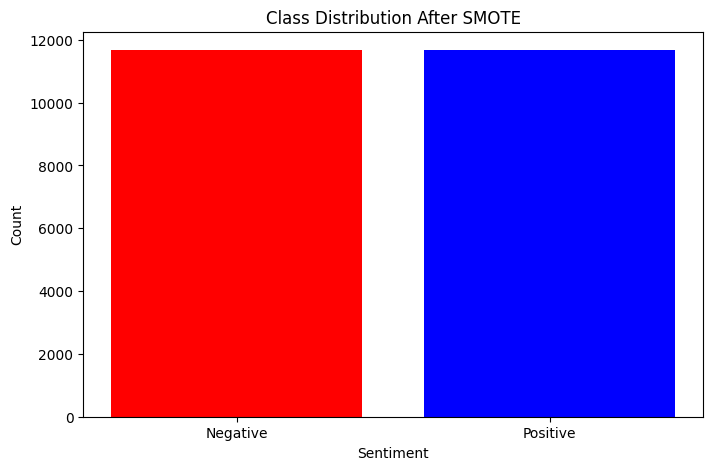

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
target=df['Sentiment'].values.tolist()
x_tr, x_test, y_tr, y_te = train_test_split(padded_tweets, df.Sentiment, test_size=0.2, stratify=df.Sentiment)
y_tr1=np.array(y_tr)
y_test=np.array(y_te)
print(y_tr1)
print(y_test)
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_tr, y_tr1)

# Check class distribution after SMOTE
print("\nAfter SMOTE:")
print("Resampled Train Set:", Counter(y_train))

# Plot the dataset
plt.figure(figsize=(8, 5))
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'red'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [ ]:
def Get_Model1(lr=0.0, lr_d=0.0, units=0, dr=0.0):
    inp = Input(shape=(max_length,))
    x = Embedding(vocab_size, 50, weights=[embedding_matrix], trainable=True)(inp)  # Allow trainable embeddings
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(LSTM(120, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)  # Increased units
    x = Conv1D(128, kernel_size=3, padding="valid", kernel_initializer="he_uniform")(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    x = concatenate([avg_pool, max_pool])
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Added L2 regularization
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Added L2 regularization
    x = Dropout(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)
    m = Model(inputs=inp, outputs=x)
    adam=legacy.Adam(lr = lr, decay = lr_d)
    m.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])
    return m

In [ ]:
model1 = Get_Model1(lr = 1e-3, lr_d = 0, units = 64,dr = 0.2)
history1=model1.fit(x_tr, y_tr1, validation_data=(x_test, y_test), epochs=10,verbose=1)
model1.save('Bilstm_model.h5')
raw_predictions = model1.predict(x_test)
eval1=model1.evaluate(x_test, y_test)
print("BILSTM model Score---> ",eval1)


Epoch 1/10
430/430 [==============================] - 69s 140ms/step - loss: 0.7750 - accuracy: 0.8511 - val_loss: 0.2989 - val_accuracy: 0.8738
Epoch 2/10
430/430 [==============================] - 65s 150ms/step - loss: 0.2723 - accuracy: 0.8899 - val_loss: 0.2266 - val_accuracy: 0.9101
Epoch 3/10
430/430 [==============================] - 64s 148ms/step - loss: 0.1935 - accuracy: 0.9285 - val_loss: 0.1867 - val_accuracy: 0.9296
Epoch 4/10
430/430 [==============================] - 64s 148ms/step - loss: 0.1465 - accuracy: 0.9491 - val_loss: 0.1644 - val_accuracy: 0.9410
Epoch 5/10
430/430 [==============================] - 64s 148ms/step - loss: 0.1121 - accuracy: 0.9626 - val_loss: 0.1688 - val_accuracy: 0.9410
Epoch 6/10
430/430 [==============================] - 63s 146ms/step - loss: 0.0879 - accuracy: 0.9714 - val_loss: 0.1603 - val_accuracy: 0.9474
Epoch 7/10
430/430 [==============================] - 63s 147ms/step - loss: 0.0743 - accuracy: 0.9777 - val_loss: 0.1681 - val_ac

<Figure size 640x480 with 0 Axes>

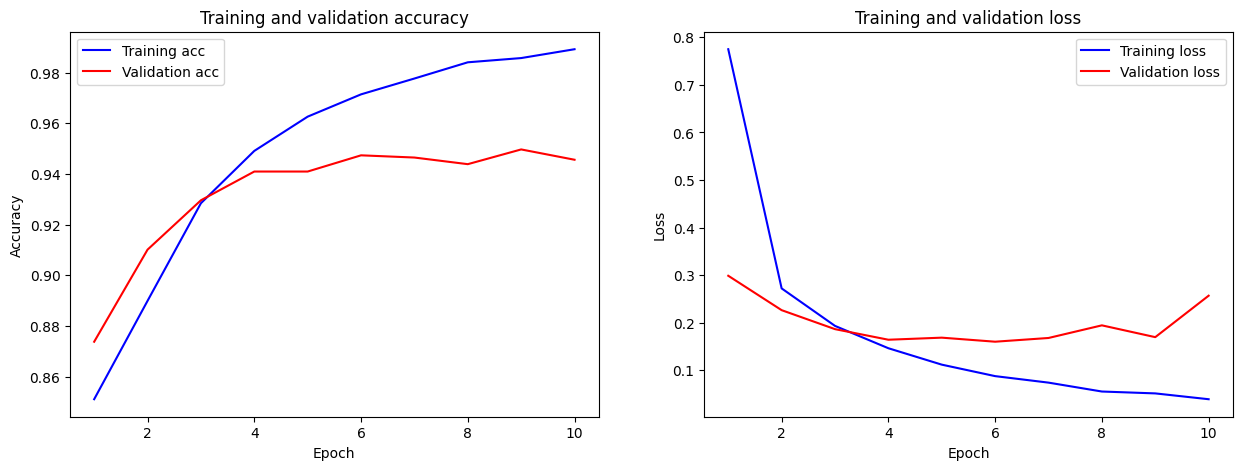

In [ ]:
def lossAndAccuracy(history, title):
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.suptitle(title)
    plt.figure(figsize=(15, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Call the function with the correct history object
lossAndAccuracy(history1, "Bilstm Model Training")

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model, x_test, y_test):
    pred = model.predict(x_test)
    y_pred = pd.Series([val[0] for val in np.where(pred >= 0.5, 1, 0)])  # Convert probabilities to binary labels

    # Generate and print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)


generate_classification_report(model1, x_test, y_test)

108/108 [==============================] - 3s 29ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       520
           1       0.96      0.97      0.97      2919

    accuracy                           0.95      3439
   macro avg       0.90      0.89      0.89      3439
weighted avg       0.94      0.95      0.95      3439



In [ ]:
def Get_Model2():
     inp = Input(shape=(max_length, ))
     x = Embedding(vocab_size, 50, weights=[embedding_matrix])(inp)
     x = Bidirectional(LSTM(60, return_sequences=True, name='lstm_layer', dropout=0.1, recurrent_dropout=0.1))(x)
     x = GlobalMaxPooling1D()(x)
     x = Dropout(0.1)(x)
     x = Dense(50, activation="relu")(x)
     x = Dropout(0.1)(x)
     x = Dense(1, activation="sigmoid")(x)
     model = Model(inputs=inp, outputs=x)
     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
     return model

In [ ]:
model2 = Get_Model2() # LSTM
history2=model2.fit(x_tr, y_tr1, validation_data=(x_test, y_test), epochs=10,verbose=1)
model2.save('Lstm_model.h5')
eval2=model2.evaluate(x_test, y_test)
print("LSTM model Score---> ",eval2)


Epoch 1/10
430/430 [==============================] - 59s 96ms/step - loss: 0.3426 - accuracy: 0.8594 - val_loss: 0.2563 - val_accuracy: 0.8930
Epoch 2/10
430/430 [==============================] - 38s 89ms/step - loss: 0.1934 - accuracy: 0.9235 - val_loss: 0.1753 - val_accuracy: 0.9314
Epoch 3/10
430/430 [==============================] - 43s 99ms/step - loss: 0.1100 - accuracy: 0.9591 - val_loss: 0.1491 - val_accuracy: 0.9427
Epoch 4/10
430/430 [==============================] - 39s 90ms/step - loss: 0.0604 - accuracy: 0.9794 - val_loss: 0.1871 - val_accuracy: 0.9389
Epoch 5/10
430/430 [==============================] - 41s 94ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.1832 - val_accuracy: 0.9407
Epoch 6/10
430/430 [==============================] - 38s 89ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.1951 - val_accuracy: 0.9430
Epoch 7/10
430/430 [==============================] - 41s 95ms/step - loss: 0.0135 - accuracy: 0.9963 - val_loss: 0.2769 - val_accuracy:

<Figure size 640x480 with 0 Axes>

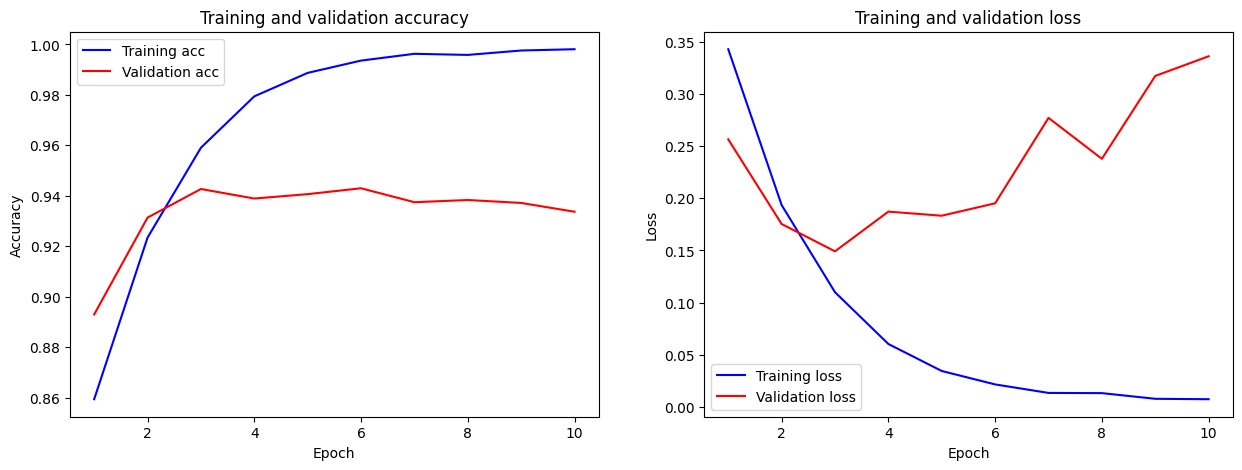

In [ ]:
def lossAndAccuracy(history, title):
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.suptitle(title)
    plt.figure(figsize=(15, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Call the function with the correct history object
lossAndAccuracy(history2, "Lstm Model Training")

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model, x_test, y_test):
    pred = model.predict(x_test)
    y_pred = pd.Series([val[0] for val in np.where(pred >= 0.5, 1, 0)])  # Convert probabilities to binary labels

    # Generate and print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)


generate_classification_report(model2, x_test, y_test)

108/108 [==============================] - 2s 10ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       520
           1       0.96      0.96      0.96      2919

    accuracy                           0.93      3439
   macro avg       0.87      0.87      0.87      3439
weighted avg       0.93      0.93      0.93      3439



In [ ]:
def Get_Model3():
    inp = Input(shape=(max_length, ))
    x = Embedding(vocab_size, 50, weights=[embedding_matrix], trainable=True)(inp)  # Allow trainable embeddings
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(GRU(128, return_sequences=True, activation='relu', dropout=0.1, recurrent_dropout=0.0))(x)  # Increased units
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    x = Dense(64, activation='relu')(conc)  # Additional Dense layer
    outp = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model3 = Get_Model3()
history3=model3.fit(x_tr, y_tr1, validation_data=(x_test, y_test), epochs=10,verbose=1)
model3.save('Gru_model.h5')
eval3=model3.evaluate(x_test, y_test)
print("GRU model Score---> ",eval3)


Epoch 1/10
430/430 [==============================] - 37s 77ms/step - loss: 0.3356 - accuracy: 0.8629 - val_loss: 0.2448 - val_accuracy: 0.8985
Epoch 2/10
430/430 [==============================] - 33s 77ms/step - loss: 0.2179 - accuracy: 0.9095 - val_loss: 0.1733 - val_accuracy: 0.9328
Epoch 3/10
430/430 [==============================] - 37s 85ms/step - loss: 0.1575 - accuracy: 0.9400 - val_loss: 0.1458 - val_accuracy: 0.9445
Epoch 4/10
430/430 [==============================] - 33s 77ms/step - loss: 0.1117 - accuracy: 0.9566 - val_loss: 0.1403 - val_accuracy: 0.9491
Epoch 5/10
430/430 [==============================] - 34s 80ms/step - loss: 0.0827 - accuracy: 0.9672 - val_loss: 0.1478 - val_accuracy: 0.9439
Epoch 6/10
430/430 [==============================] - 34s 78ms/step - loss: 0.0603 - accuracy: 0.9768 - val_loss: 0.1540 - val_accuracy: 0.9543
Epoch 7/10
430/430 [==============================] - 33s 76ms/step - loss: 0.0471 - accuracy: 0.9828 - val_loss: 0.1550 - val_accuracy:

<Figure size 640x480 with 0 Axes>

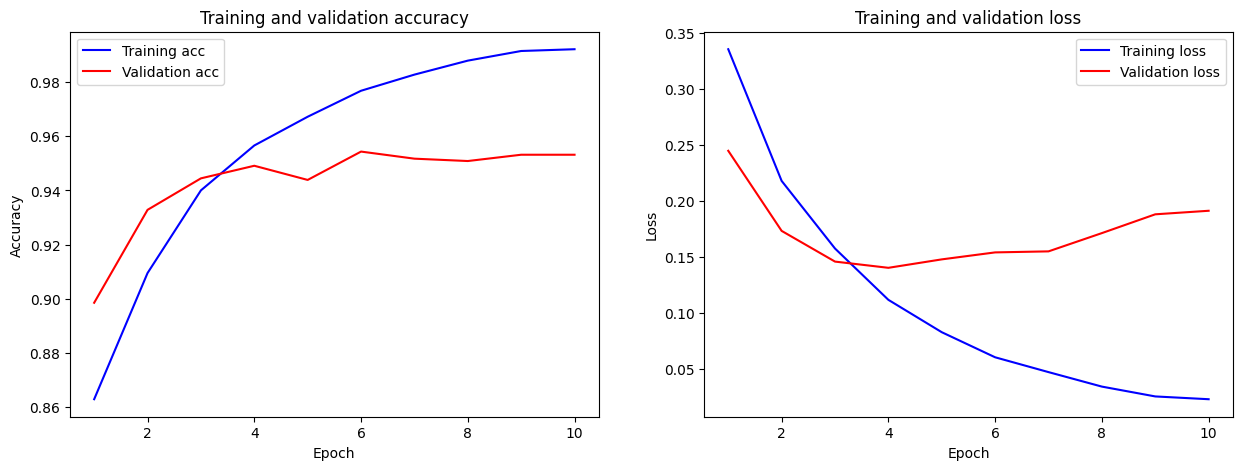

In [ ]:
def lossAndAccuracy(history, title):
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.suptitle(title)
    plt.figure(figsize=(15, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Call the function with the correct history object
lossAndAccuracy(history3, "GRU Model Training")

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model, x_test, y_test):
    pred = model.predict(x_test)
    y_pred = pd.Series([val[0] for val in np.where(pred >= 0.5, 1, 0)])  # Convert probabilities to binary labels

    # Generate and print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)


generate_classification_report(model3, x_test, y_test)

108/108 [==============================] - 2s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       520
           1       0.97      0.98      0.97      2919

    accuracy                           0.95      3439
   macro avg       0.92      0.89      0.91      3439
weighted avg       0.95      0.95      0.95      3439



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense
# Create an ensemble model
def create_ensemble(models, model_input):
    outputs = [model(model_input) for model in models]
    ensemble = Concatenate()(outputs)
    ensemble = Dense(128, activation='relu')(ensemble)
    ensemble = Dropout(0.5)(ensemble)  # Added dropout for regularization
    ensemble = Dense(1, activation='sigmoid')(ensemble)
    model = Model(inputs=model_input, outputs=ensemble)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
def prediction(text):
    r = preprocess(text)
    tokenizer.fit_on_texts([r])
    tokenized_query = tokenizer.texts_to_sequences([r])
    max_len = max(len(seq) for seq in tokenized_query)
    padded_query =sequence.pad_sequences(tokenized_query, maxlen=max_len, padding='post')
    score = updated_ensemble_model.predict([padded_query])
    score = score[0]

    if score > 0 or score < 0:
        print("Positive" if score > 0 else "Neutral")
    else:
        print("Negative")

        return

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import math

# Input layer for the ensemble model
ensemble_input = Input(shape=(max_length,))

# Create individual models
model1_lstm = Get_Model1()
model2_bilstm = Get_Model2()
model3_Gru = Get_Model3()

# Create the ensemble model
models = [model1_lstm, model2_bilstm, model3_Gru]
ensemble_model = create_ensemble(models, ensemble_input)

# Define a learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 0.001
    drop = 0.8
    epochs_drop = 10
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

# Create a learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use the Adam optimizer with weight decay (L2 regularization)
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Model definition with L2 regularization on dense layers
x = ensemble_model.layers[-2].output  # Output of the last dense layer before the final prediction layer
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)

# Final prediction layer
predictions = Dense(1, activation="sigmoid")(x)

# Create the modified ensemble model
updated_ensemble_model = Model(inputs=ensemble_input, outputs=predictions)

# Compile your ensemble model with the updated optimizer and regularization
updated_ensemble_model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

# Train the ensemble model with the learning rate scheduler and early stopping
history = updated_ensemble_model.fit(x_tr, y_tr1, validation_data=(x_test, y_test), epochs=10, callbacks=[lr_scheduler, early_stopping], verbose=1)

# Evaluate the ensemble model
eval_ensemble = updated_ensemble_model.evaluate(x_test, y_test)
print("Updated Ensemble Model Score:", eval_ensemble)

# Save the updated ensemble model
updated_ensemble_model.save('updated_ensemble_model.h5')


Epoch 1/10
430/430 [==============================] - 157s 311ms/step - loss: 0.7163 - accuracy: 0.8443 - val_loss: 0.2898 - val_accuracy: 0.8488 - lr: 0.0010
Epoch 2/10
430/430 [==============================] - 131s 304ms/step - loss: 0.2605 - accuracy: 0.8846 - val_loss: 0.2439 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 3/10
430/430 [==============================] - 133s 309ms/step - loss: 0.1808 - accuracy: 0.9392 - val_loss: 0.1853 - val_accuracy: 0.9363 - lr: 0.0010
Epoch 4/10
430/430 [==============================] - 131s 304ms/step - loss: 0.1151 - accuracy: 0.9636 - val_loss: 0.1614 - val_accuracy: 0.9485 - lr: 0.0010
Epoch 5/10
430/430 [==============================] - 132s 306ms/step - loss: 0.0760 - accuracy: 0.9794 - val_loss: 0.1848 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 6/10
430/430 [==============================] - 133s 309ms/step - loss: 0.0504 - accuracy: 0.9879 - val_loss: 0.2179 - val_accuracy: 0.9360 - lr: 0.0010
Epoch 7/10
430/430 [==========================

<Figure size 640x480 with 0 Axes>

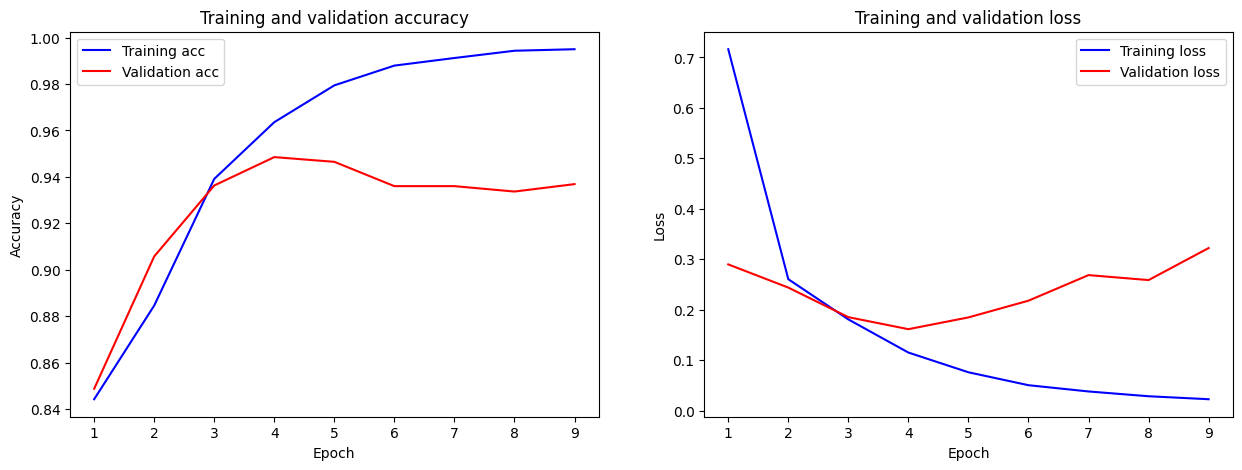

In [ ]:
def lossAndAccuracy(history, title):
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.suptitle(title)
    plt.figure(figsize=(15, 5))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Call the function with the correct history object
lossAndAccuracy(history,"Ensemble  Model Training")

In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model, x_test, y_test):
    pred = model.predict(x_test)
    y_pred = pd.Series([val[0] for val in np.where(pred >= 0.5, 1, 0)])  # Convert probabilities to binary labels

    # Generate and print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)


generate_classification_report(updated_ensemble_model, x_test, y_test)

108/108 [==============================] - 6s 41ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       520
           1       0.96      0.98      0.97      2919

    accuracy                           0.95      3439
   macro avg       0.91      0.89      0.90      3439
weighted avg       0.95      0.95      0.95      3439



108/108 [==============================] - 4s 34ms/step
Confusion Matrix:
 [[ 415  105]
 [  72 2847]]


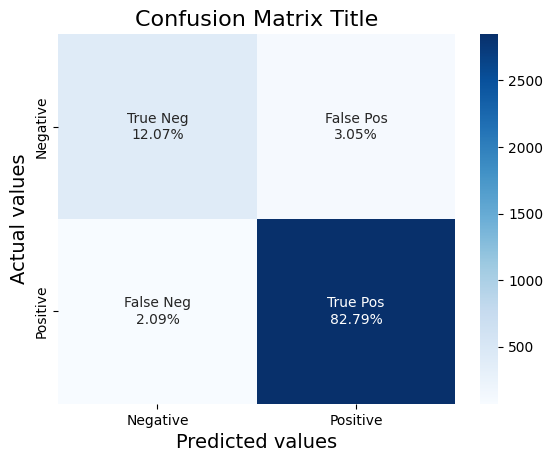

In [ ]:
from sklearn.metrics import confusion_matrix
def generate_confusion_matrix(model, x_test, y_test, title):
    pred = model.predict(x_test)
    y_pred = pd.Series([val[0] for val in np.where(pred >= 0.5, 1, 0)])  # Convert probabilities to binary labels

    # Compute the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    print("Confusion Matrix:\n", cf_matrix)

    # Plot the confusion matrix
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size': 14})
    plt.ylabel("Actual values", fontdict={'size': 14})
    plt.title(title, fontdict={'size': 16})
    plt.show()

generate_confusion_matrix(updated_ensemble_model, x_test, y_test, "Confusion Matrix Title")

In [ ]:
def Prediction(text):
    r = preprocess(text)
    tokenizer.fit_on_texts([r])
    tokenized_query = tokenizer.texts_to_sequences([r])
    max_len = max(len(seq) for seq in tokenized_query)
    padded_query =sequence.pad_sequences(tokenized_query, maxlen=max_len)
    score = updated_ensemble_model.predict([padded_query])[0]
    #score = score[0]

    if score > 0 or score < 0:
        print("Negative" if score < 0 else "Neutral")
    else:
        print("Positive")

        return

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words_to_remove = {'not', 'neither','nor','either','or'}

# Remove words using a loop
for word in words_to_remove:
    stop_words.discard(word)


# Create an instance of Tokenizer
tokenizer = Tokenizer()

def preprocess(text):
    r = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', text)
    r = r.lower()
    r = r.split()
    r=[word for word in r if word not in stop_words]
    print(r)
    return r

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Prediction("food is good")

['food', 'good']
1/1 [==============================] - 0s 123ms/step
Positive


In [ ]:
Prediction("the food is not bad")


['food', 'not', 'bad']
1/1 [==============================] - 0s 45ms/step
Neutral


In [ ]:
Prediction("movie is good or bad")

['movie', 'good', 'or', 'bad']
1/1 [==============================] - 0s 36ms/step
Neutral


In [ ]:
Prediction("movie is neither good nor bad")

['movie', 'neither', 'good', 'nor', 'bad']
1/1 [==============================] - 0s 33ms/step
Neutral


In [ ]:
Prediction("movie is horrible")

['movie', 'horrible']
1/1 [==============================] - 0s 39ms/step
Negative
